***Part 1***

In [1]:
import pandas as pd

# Replace the file path with the actual path to your JSON file
file_path = r"meta_Electronics.json.gz"
reviews =r'Electronics_5.json.gz'


import pandas as pd

def read_large_file_in_chunks(file_path, chunk_size):
    # Initialize an empty list to store the chunks
    chunk_list = []
    
    # Read the file in chunks and append each chunk to the list
    chunks = pd.read_json(file_path, lines=True,compression='gzip' , chunksize=chunk_size)
    for chunk in chunks:
        chunk_list.append(chunk)
    
    # Concatenate all chunks into a single DataFrame
    full_data = pd.concat(chunk_list, ignore_index=True)
    
    return full_data

# Specify the chunk size
chunk_size = 100000  # Adjust based on memory constraints

# Read the entire dataset and metadata without row limits
df_dataset = read_large_file_in_chunks(reviews, chunk_size)
df_metadata = read_large_file_in_chunks(file_path,chunk_size)

In [2]:
df_dataset.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [3]:
df_metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN


In [49]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:


# Filter df_metadata for "Headphones"
df_headphones_metadata = df_metadata[df_metadata['title'].str.contains("Charging cable", case=False, na=False)]

# Merge with reviews
df_reviews_headphones = pd.merge(df_dataset, df_headphones_metadata[['asin']], on='asin')

subset_columns = ['reviewerID', 'asin', 'reviewTime']

df_reviews_headphones.drop_duplicates(subset=subset_columns, inplace=True)
df_reviews_headphones.dropna(subset=['reviewText'], inplace=True)

# Report the total number of rows for "Headphones"
total_rows = len(df_reviews_headphones)
print(f"Total number of rows for 'Charging cables': {total_rows}")


Total number of rows for 'Charging cables': 19456


In [51]:
# Number of Reviews
num_reviews = len(df_reviews_headphones)

# Average Rating Score
average_rating = df_reviews_headphones['overall'].mean()

# Number of Unique Products
num_unique_products = df_reviews_headphones['asin'].nunique()

# Number of Good Ratings
num_good_ratings = df_reviews_headphones[df_reviews_headphones['overall'] >= 3].count()['overall']

# Number of Bad Ratings
num_bad_ratings = df_reviews_headphones[df_reviews_headphones['overall'] < 3].count()['overall']

# Number of Reviews corresponding to each Rating
reviews_per_rating = df_reviews_headphones.groupby('overall').size()

# Display the statistics
print(f"Number of Reviews: {num_reviews}")
print(f"Average Rating Score: {average_rating:.2f}")
print(f"Number of Unique Products: {num_unique_products}")
print(f"Number of Good Ratings: {num_good_ratings}")
print(f"Number of Bad Ratings: {num_bad_ratings}")
print("Number of Reviews corresponding to each Rating:")
print(reviews_per_rating)


Number of Reviews: 19456
Average Rating Score: 4.20
Number of Unique Products: 439
Number of Good Ratings: 16541
Number of Bad Ratings: 2915
Number of Reviews corresponding to each Rating:
overall
1     1923
2      992
3     1220
4     2410
5    12911
dtype: int64


In [52]:
import unicodedata  # Add this import statement


In [53]:
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


charging_cable_acronyms = {
    'USB': 'Universal Serial Bus', 'USB-C': 'Universal Serial Bus Type C', 'USB-A': 'Universal Serial Bus Type A',
    'USB-B': 'Universal Serial Bus Type B', 'USB 2.0': 'Universal Serial Bus Version 2.0', 'USB 3.0': 'Universal Serial Bus Version 3.0',
    'USB PD': 'USB Power Delivery', 'PD': 'Power Delivery', 'mAh': 'Milliamp Hour', 'A': 'Ampere',
    'V': 'Volt', 'W': 'Watt', 'Wh': 'Watt Hour', 'QC': 'Quick Charge', 'LED': 'Light Emitting Diode',
    'OEM': 'Original Equipment Manufacturer', 'Li-ion': 'Lithium Ion', 'NiMH': 'Nickel Metal Hydride',
    'AC': 'Alternating Current', 'DC': 'Direct Current', 'MFI': 'Made For iPhone/iPad',
    'AWG': 'American Wire Gauge', 'HDMI': 'High Definition Multimedia Interface', 'DP': 'DisplayPort',
    'TB': 'Thunderbolt', 'PVC': 'Polyvinyl Chloride', 'TPE': 'Thermoplastic Elastomer',
    'EMI': 'Electromagnetic Interference', 'RFI': 'Radio Frequency Interference', 'IP': 'Ingress Protection',
    'IoT': 'Internet of Things', 'SBC': 'Single Board Computer', 'CE': 'Conformité Européenne',
    'FCC': 'Federal Communications Commission', 'UL': 'Underwriters Laboratories', 'RoHS': 'Restriction of Hazardous Substances',
    'PSE': 'Product Safety Electrical Appliance & Material', 'BSMI': 'Bureau of Standards, Metrology and Inspection',
    'KCC': 'Korea Certification Commission', 'SAA': 'Standards Association of Australia',
    'ERP': 'Energy-Related Products', 'CCC': 'China Compulsory Certificate', 'C-tick': 'Australian Certification Mark for Electromagnetic Compatibility',
    'GFCI': 'Ground Fault Circuit Interrupter', 'MOSFET': 'Metal Oxide Semiconductor Field Effect Transistor',
    'PCB': 'Printed Circuit Board', 'SMD': 'Surface Mount Device', 'DIP': 'Dual In-line Package',
    'BT': 'Bluetooth', 'RF': 'Radio Frequency', 'IC': 'Integrated Circuit', 'ESD': 'Electrostatic Discharge',
    'FOM': 'Figure of Merit', 'PPTC': 'Polymeric Positive Temperature Coefficient', 'NTC': 'Negative Temperature Coefficient',
    'PTC': 'Positive Temperature Coefficient', 'LDO': 'Low Dropout', 'SOC': 'State of Charge',
    'SOH': 'State of Health', 'LVP': 'Low Voltage Protection', 'OVP': 'Over Voltage Protection',
    'OCP': 'Over Current Protection', 'OTP': 'Over Temperature Protection', 'OPP': 'Over Power Protection',
    'SCP': 'Short Circuit Protection', 'DPDM': 'Dual Role Power Data Management', 'DRP': 'Dual Role Power',
    'D+': 'Data Plus', 'D-': 'Data Minus', 'SOP': 'Start of Packet', 'EOP': 'End of Packet',
    'CC': 'Configuration Channel', 'Vbus': 'Voltage Bus', 'GND': 'Ground'
}

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def expand_acronyms(text, acronym_dict):
    words = word_tokenize(text)
    expanded_words = [acronym_dict.get(word, word) for word in words]
    return ' '.join(expanded_words)

def preprocess_text(text, acronym_dict):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Expand acronyms
    text = expand_acronyms(text, acronym_dict)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Lemmatization and remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text.lower()

# Apply preprocessing to reviewText
df_reviews_headphones['processed_reviewText'] = df_reviews_headphones['reviewText'].apply(preprocess_text)


C:\Users\AKHIL\AppData\Local\Temp\ipykernel_7440\2836326191.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\AKHIL\AppData\Local\Temp\ipykernel_7440\2836326191.py:6: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure these modules are imported at the beginning of your script
import pandas as pd
import numpy as np
from datetime import datetime

In [55]:
# a. Top 20 Most Reviewed Brands
top_20_most_reviewed_brands = df_headphones_metadata['brand'].value_counts().head(20)
print("Top 20 most reviewed brands:\n", top_20_most_reviewed_brands)

Top 20 most reviewed brands:
 brand
iTEKIRO               220
UPBRIGHT               59
HQRP                   29
Live2Pedal             28
NiceTQ                 27
ReadyPlug              27
Life-Tech              25
Conwork                23
Generic                22
ANiceS                 21
Super Power Supply     20
                       17
Factory Direct         17
CoverON                16
Cabepow                14
MyNetDeals             14
WILLTOP                14
ALPHA TECH             13
TUSITA                 13
iTKEIRO                13
Name: count, dtype: int64


In [56]:
# b. Top 20 Least Reviewed Brands
top_20_least_reviewed_brands = df_headphones_metadata['brand'].value_counts().tail(20)
print("\nTop 20 least reviewed brands:\n", top_20_least_reviewed_brands)


Top 20 least reviewed brands:
 brand
Everus                              1
Shenzhen TOZ Technology co., LTD    1
Acasis                              1
Equinux                             1
LANSUNS                             1
Voroar                              1
CJRSLRB                             1
enKo Products                       1
Fully                               1
LEPOWER                             1
Motorola FRS                        1
KssFire                             1
CTYRZCH                             1
Bodelin                             1
amovee                              1
KaLaiXing                           1
Comkia                              1
MISSJIRA                            1
Aplusphone                          1
SZ                                  1
Name: count, dtype: int64


In [30]:
# c. Most Positively Reviewed Headphone
# Assuming 'overall' is the rating column and higher ratings are better
most_positively_reviewed_headphone = df_reviews_headphones.groupby('asin').agg({
    'overall': 'mean'
}).sort_values('overall', ascending=False).head(1)
print("\nMost positively reviewed Charging Cable ASIN and average rating:\n", most_positively_reviewed_headphone)


Most positively reviewed Charging Cable ASIN and average rating:
             overall
asin               
B0173MPK8O      5.0


In [58]:
# d. Count of Ratings for the Product Over 5 Consecutive Years
df_reviews_headphones['year'] = pd.to_datetime(df_reviews_headphones['reviewTime']).dt.year
ratings_per_year = df_reviews_headphones.groupby('year').size().sort_index().tail(5)
print("\nCount of ratings for the product over 5 consecutive years:\n", ratings_per_year)


Count of ratings for the product over 5 consecutive years:
 year
2014    2496
2015    5059
2016    6373
2017    3279
2018    1105
dtype: int64


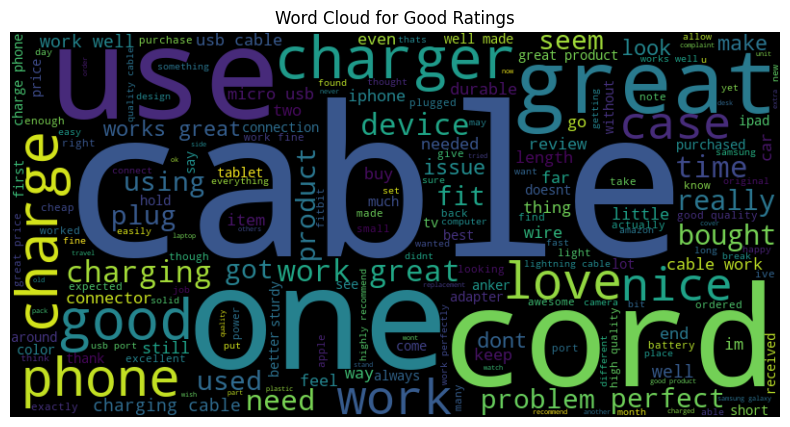

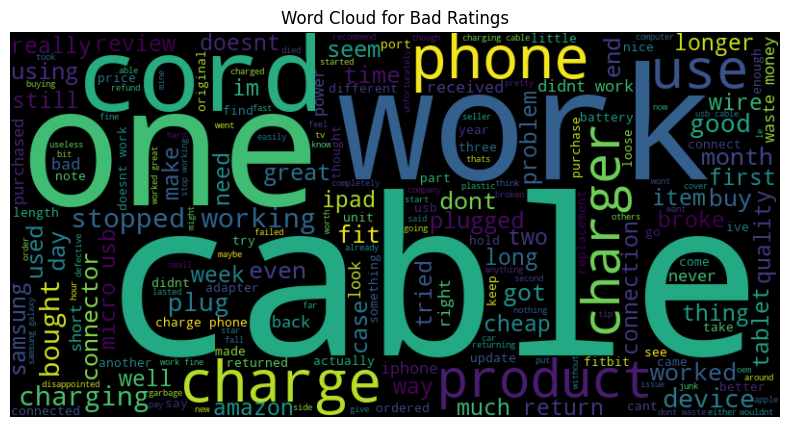

In [59]:
# e. Word Cloud for ‘Good’ and ‘Bad’ Ratings
good_reviews = df_reviews_headphones[df_reviews_headphones['overall'] >= 3]['processed_reviewText'].str.cat(sep=' ')
bad_reviews = df_reviews_headphones[df_reviews_headphones['overall'] < 3]['processed_reviewText'].str.cat(sep=' ')

wordcloud_good = WordCloud(width=800, height=400).generate(good_reviews)
wordcloud_bad = WordCloud(width=800, height=400).generate(bad_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')
plt.show()

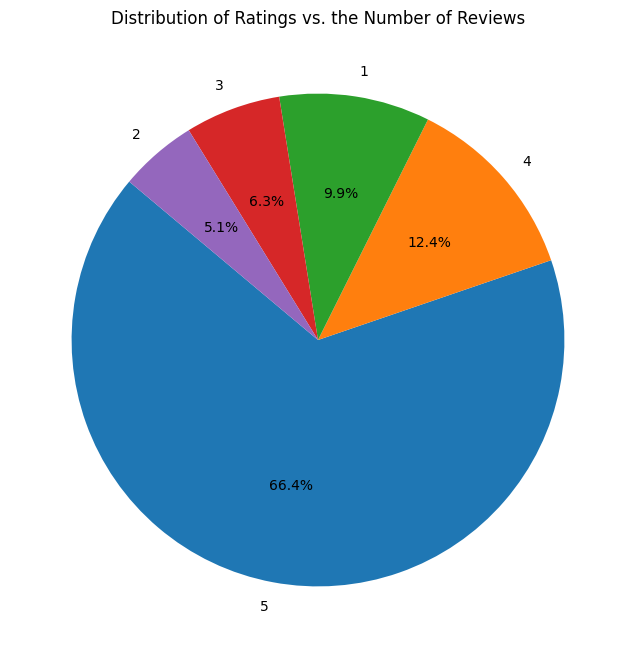

In [60]:
# f. Pie Chart for Distribution of Ratings vs. the No. of Reviews
ratings_distribution = df_reviews_headphones['overall'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. the Number of Reviews')
plt.show()

In [61]:
# g. Year with Maximum Reviews
year_with_max_reviews = df_reviews_headphones['year'].value_counts().idxmax()
print("\nYear with maximum reviews:", year_with_max_reviews)


Year with maximum reviews: 2016


In [62]:
# h. Year with the Highest Number of Customers
# Assuming 'reviewerID' uniquely identifies customers
year_with_most_customers = df_reviews_headphones.groupby('year')['reviewerID'].nunique().idxmax()
print("\nYear with the highest number of customers:", year_with_most_customers)


Year with the highest number of customers: 2016


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Step 8: Create the target variable based on rating
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating < 3:
        return 'Bad'
    else:
        return 'Average'

df_reviews_headphones['rating_category'] = df_reviews_headphones['overall'].apply(categorize_rating)


In [66]:
df_reviews_headphones.to_csv('df_reviews.csv',index=False)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading the dataset
df_reviews_headphones = pd.read_csv('df_reviews.csv', encoding='utf-8')


tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_reviews_headphones['processed_reviewText'])


# Fill NaN values with an empty string
df_reviews_headphones['processed_reviewText'].fillna('', inplace=True)



In [69]:
# Step 9: Prepare features and labels, then split them
X = df_reviews_headphones['processed_reviewText']  # Features
y = df_reviews_headphones['rating_category']  # Target variable

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=100, n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Model: Logistic Regression")
print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

     Average       0.47      0.24      0.31       313
         Bad       0.74      0.71      0.73       640
        Good       0.92      0.97      0.94      3911

    accuracy                           0.89      4864
   macro avg       0.71      0.64      0.66      4864
weighted avg       0.87      0.89      0.88      4864



In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("Model: K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

     Average       0.35      0.06      0.10       313
         Bad       0.62      0.35      0.45       640
        Good       0.86      0.97      0.91      3911

    accuracy                           0.83      4864
   macro avg       0.61      0.46      0.49      4864
weighted avg       0.79      0.83      0.80      4864



In [72]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm_model = LinearSVC(dual=False, max_iter=100)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Model: Linear SVM")
print(classification_report(y_test, y_pred))


Model: Linear SVM
              precision    recall  f1-score   support

     Average       0.44      0.27      0.33       313
         Bad       0.73      0.74      0.74       640
        Good       0.93      0.95      0.94      3911

    accuracy                           0.88      4864
   macro avg       0.70      0.66      0.67      4864
weighted avg       0.87      0.88      0.88      4864



c:\Users\AKHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Model: Naive Bayes")
print(classification_report(y_test, y_pred))


Model: Naive Bayes
              precision    recall  f1-score   support

     Average       0.21      0.03      0.05       313
         Bad       0.72      0.65      0.68       640
        Good       0.89      0.97      0.93      3911

    accuracy                           0.87      4864
   macro avg       0.61      0.55      0.55      4864
weighted avg       0.83      0.87      0.84      4864



In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Model: Decision Tree")
print(classification_report(y_test, y_pred))


Model: Decision Tree
              precision    recall  f1-score   support

     Average       0.44      0.02      0.04       313
         Bad       0.63      0.41      0.50       640
        Good       0.86      0.97      0.91      3911

    accuracy                           0.84      4864
   macro avg       0.64      0.47      0.48      4864
weighted avg       0.80      0.84      0.80      4864



In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Loading the dataset
df_reviews = pd.read_csv('df_reviews.csv', encoding='utf-8')

# Fill NaN values with an empty string
df_reviews['processed_reviewText'].fillna('', inplace=True)



MAE for 10 neighbors: 0.24447957718442326
MAE for 20 neighbors: 0.24344435465172745
MAE for 30 neighbors: 0.2430754553426476
MAE for 40 neighbors: 0.2436431699374561
MAE for 50 neighbors: 0.24408568254043855


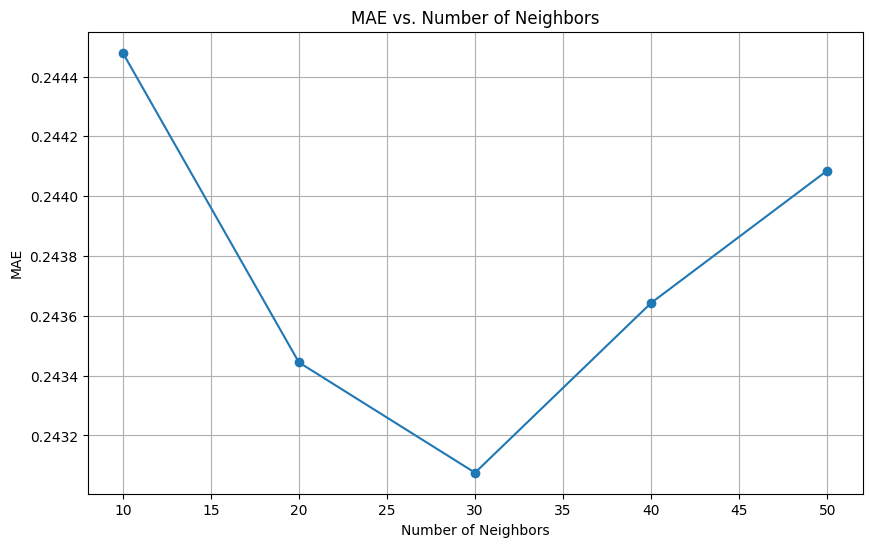

Top 10 Products by User Sum Ratings:
 asin
B00R1EPGRA    12396.5
B00TIT3KYC    11978.0
B0177MQWC8     2099.0
B00MY05GNA     1921.0
B00SVNGKJ8     1860.0
B01DNTWGYM     1192.0
B01ANLA6OU     1041.0
B0177L6A4O      982.0
B01HCT3GCU      935.0
B01FVUHW1I      838.5
dtype: float64


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_reviews is your DataFrame

# Create user-item rating matrix
user_item_matrix = df_reviews.pivot_table(index='reviewerID', columns='asin', values='overall').fillna(0)

# Normalize the ratings
scaler = MinMaxScaler()
user_item_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.columns)

# Compute User-User Similarity Matrix
user_similarity_matrix = cosine_similarity(user_item_matrix_scaled)
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

def predict_rating(user_id, item_id, top_n, user_similarity_df, user_item_matrix_scaled):
    similarities = user_similarity_df.loc[user_id]
    top_n_users = similarities.nlargest(top_n + 1)[1:]  # Excluding the user itself
    top_n_users_ratings = user_item_matrix_scaled.loc[top_n_users.index, item_id]
    weighted_sum = np.dot(top_n_users, top_n_users_ratings) / top_n_users.sum() if top_n_users.sum() > 0 else 0
    return weighted_sum

def evaluate_user_cf(n_neighbors):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = []

    for train_index, test_index in kf.split(user_item_matrix_scaled):
        mae_per_fold = []
        for user_id in user_item_matrix_scaled.index[test_index]:
            for item_id in user_item_matrix_scaled.columns:
                actual_rating = user_item_matrix_scaled.loc[user_id, item_id]
                if actual_rating > 0:  # If there was a rating
                    predicted_rating = predict_rating(user_id, item_id, n_neighbors, user_similarity_df, user_item_matrix_scaled)
                    mae_per_fold.append(abs(predicted_rating - actual_rating))
        mae_scores.append(np.mean(mae_per_fold))
    return np.mean(mae_scores)

n_neighbors_list = [10, 20, 30, 40, 50]
mae_results = []

for n_neighbors in n_neighbors_list:
    mae = evaluate_user_cf(n_neighbors)
    mae_results.append(mae)
    print(f'MAE for {n_neighbors} neighbors: {mae}')

# Plot MAE results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, mae_results, marker='o', linestyle='-')
plt.title('MAE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

# Top 10 Products by User Sum Ratings
top_10_products = user_item_matrix.sum().nlargest(10)
print("Top 10 Products by User Sum Ratings:\n", top_10_products)


MAE for 10 neighbors (Item-Item CF): 0.017511671335200745
MAE for 20 neighbors (Item-Item CF): 0.01737878096975224
MAE for 30 neighbors (Item-Item CF): 0.01737878096975224
MAE for 40 neighbors (Item-Item CF): 0.01737878096975224
MAE for 50 neighbors (Item-Item CF): 0.01737878096975224


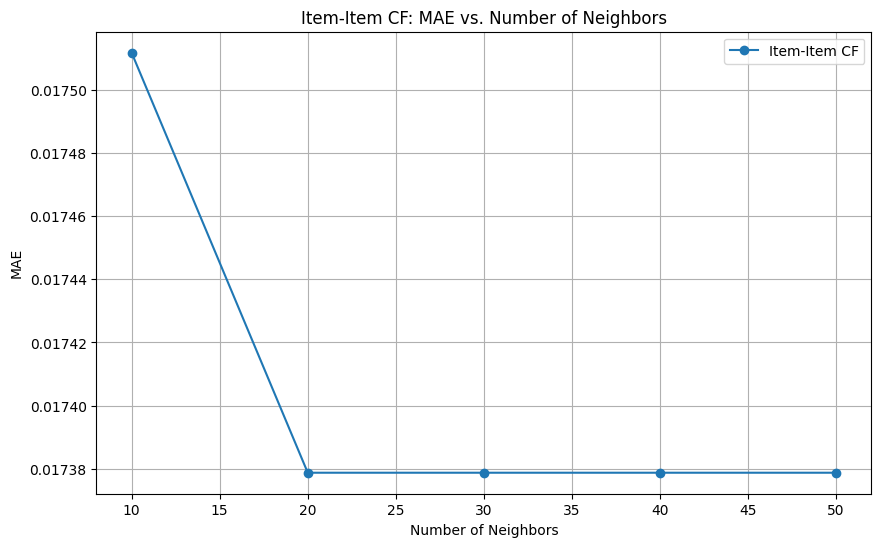

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_reviews is loaded as per your description

# Create user-item rating matrix and normalize
user_item_matrix = df_reviews.pivot_table(index='reviewerID', columns='asin', values='overall').fillna(0)
scaler = MinMaxScaler()
user_item_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.columns)

# Compute Item-Item Similarity Matrix
item_similarity_matrix = cosine_similarity(user_item_matrix_scaled.T)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def predict_item_rating(item_id, user_id, top_n, item_similarity_df, user_item_matrix_scaled):
    # Check if user_id and item_id exist in the matrix
    if user_id not in user_item_matrix_scaled.index or item_id not in item_similarity_df.index:
        return np.nan
    similarities = item_similarity_df[item_id].sort_values(ascending=False)
    similarities = similarities.drop(index=item_id)  # Remove self-similarity
    top_n_items = similarities.head(top_n).index
    user_ratings = user_item_matrix_scaled.loc[user_id, top_n_items]
    valid_ratings = user_ratings[user_ratings > 0]
    if not valid_ratings.empty:
        weighted_sum = np.dot(valid_ratings, similarities[valid_ratings.index]) / np.sum(similarities[valid_ratings.index])
        return weighted_sum
    return np.nan

def evaluate_item_cf(n_neighbors):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mae_scores = []
    
    for train_index, test_index in kf.split(user_item_matrix_scaled.T):  # Transpose to iterate over items
        mae_per_fold = []
        test_matrix = user_item_matrix_scaled.iloc[test_index]  # Test matrix for users
        for item_id in item_similarity_df.index:
            for user_id in test_matrix.index:
                actual_rating = test_matrix.loc[user_id, item_id]
                if actual_rating > 0:
                    predicted_rating = predict_item_rating(item_id, user_id, n_neighbors, item_similarity_df, user_item_matrix_scaled)
                    if not np.isnan(predicted_rating):
                        mae_per_fold.append(abs(predicted_rating - actual_rating))
        mae_scores.append(np.mean(mae_per_fold))
    return np.mean(mae_scores)

# Evaluating and Plotting
n_neighbors_list = [10, 20, 30, 40, 50]
mae_results_item = []

for n_neighbors in n_neighbors_list:
    mae = evaluate_item_cf(n_neighbors)
    mae_results_item.append(mae)
    print(f'MAE for {n_neighbors} neighbors (Item-Item CF): {mae}')

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, mae_results_item, marker='o', linestyle='-', label='Item-Item CF')
plt.title('Item-Item CF: MAE vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()
